In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df = pd.read_csv('datatran2024.csv', encoding='ISO-8859-1',sep=';', low_memory=False)

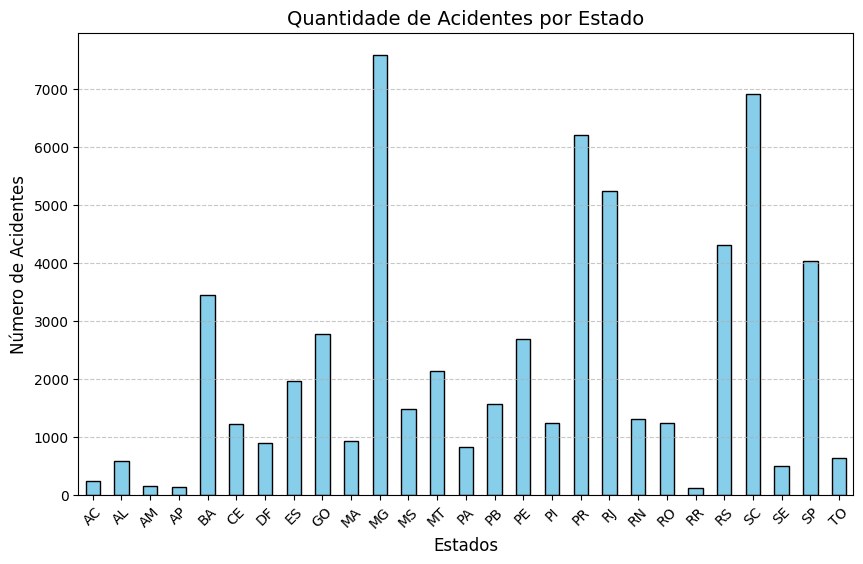

In [ ]:
#Agrupamento dos dados

acidentes_por_estados = df.groupby('uf').size() 

#Criação do gráfico

ax = acidentes_por_estados.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title("Quantidade de Acidentes por Estado", fontsize=14)
plt.xlabel("Estados", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("acidentes_por_estado.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Agrupamento dos dados
causa_geral = df.groupby('causa_acidente').size().sort_values(ascending=False).head(10)
tipo_geral = df.groupby('tipo_acidente').size().sort_values(ascending=False).head(10)

tipo_geral


tipo_acidente
Colisão traseira                  11638
Saída de leito carroçável          8791
Colisão transversal                7761
Colisão lateral mesmo sentido      6546
Tombamento                         5311
Colisão com objeto                 4140
Colisão frontal                    3951
Queda de ocupante de veículo       2807
Atropelamento de Pedestre          2661
Colisão lateral sentido oposto     1663
dtype: int64

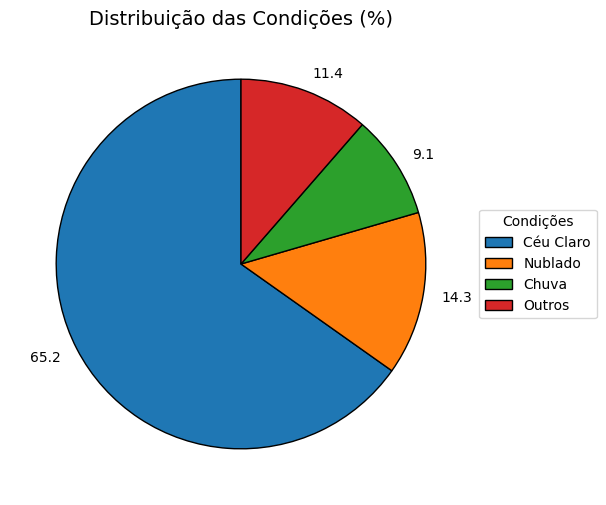

In [ ]:
#Agrupamento dos dados
condicao_meteorologica = df.groupby('condicao_metereologica').size().sort_values(ascending=False).head(10)

#Variavéis para calculos probabilisticos
probabilidades = []
total_de_dados = len(df)
outros = 0
categorias = []

#Calcula probabilidades de acidentes

def probabilidade (): 
    global outros 
    limite = 5.5

    for condiçao,ocorrencias in condicao_meteorologica.items():
        prob = (ocorrencias / total_de_dados) * 100
        
        if prob < limite: # Cria a categoria 'outros' para facilitar a vizualização do gráfico
            outros += prob
        else:
            probabilidades.append(round(prob,1))
            categorias.append(condiçao)


probabilidade()

if outros > 0: #adiciona o somatório das condições menores que 5% na lista categorias 
    probabilidades.append(round(outros, 1))
    categorias.append('Outros')


#Criação do gráfico

plt.figure(figsize=(8, 6))
plt.pie(probabilidades,labels= probabilidades,startangle=90,wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title("Distribuição das Condições (%)", fontsize=14)
plt.legend(categorias, title="Condições", loc="center left", bbox_to_anchor=(1, 0.5))


plt.savefig("Distribuição das Condições(%).png", dpi=300, bbox_inches='tight')
plt.show()




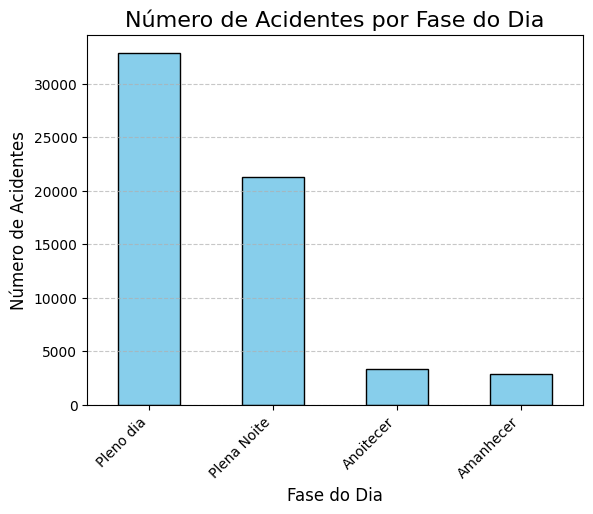

In [ ]:
#Agrupamento dos dados
fase_do_dia = df.groupby('fase_dia').size().sort_values(ascending=False)

#Criação do gráfico
fase_do_dia.plot(kind='bar',color='skyblue', edgecolor='black')

plt.title("Número de Acidentes por Fase do Dia", fontsize=16)
plt.xlabel("Fase do Dia", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.savefig("Número de Acidentes por Fase do Dia", dpi=300, bbox_inches='tight')
plt.show()

